# <center> **Consumer Behavior and Shopping Habits Research**

# <center> *Let's begin!*

## 1. Import libraries

In [58]:
import numpy as np
import pandas as pd

import functions as funcs

import matplotlib.pyplot as plt
import seaborn as sb 

from sklearn import preprocessing as pp
from sklearn import linear_model as lm 
from sklearn import model_selection as ms 
from sklearn import metrics as m
from sklearn import tree as t 
from sklearn import ensemble as en

plt.style.use('bmh')

import warnings
warnings.filterwarnings('ignore')

RS = 95

## 2. Read Data

In [59]:
data = pd.read_csv('data/shopping_behavior_updated.csv', 
                   index_col='Customer ID')

data

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
Customer ID,,,,,,,,,,,,,,,,,
1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly


In [60]:
funcs.get_data_info(data) 

,Nulls,Uniques,Dtypes
Age,0.0,53,int64
Gender,0.0,2,object
Item Purchased,0.0,25,object
Category,0.0,4,object
Purchase Amount (USD),0.0,81,int64
Location,0.0,50,object
Size,0.0,4,object
Color,0.0,25,object
Season,0.0,4,object
Review Rating,0.0,26,float64


In [61]:
data.describe(exclude='object').round(2) 

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.00,3900.00,3900.00,3900.00
mean,44.07,59.76,3.75,25.35
std,15.21,23.69,0.72,14.45
min,18.00,20.00,2.50,1.00
25%,31.00,39.00,3.10,13.00
50%,44.00,60.00,3.70,25.00
75%,57.00,81.00,4.40,38.00
max,70.00,100.00,5.00,50.00


In [62]:
data.describe(include='object').round(2) 

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,675,2223,2223,677,584


> There are no Null values in our data

# <center> *Here comes the EDA*

In [63]:
data['Frequency of Purchases'].value_counts() 

Frequency of Purchases
Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: count, dtype: int64

In [64]:
get_purch_freq = lambda freq: (data[data['Frequency of Purchases'] == freq]
                               .drop('Frequency of Purchases', axis=1)
                               .reset_index(drop=True))

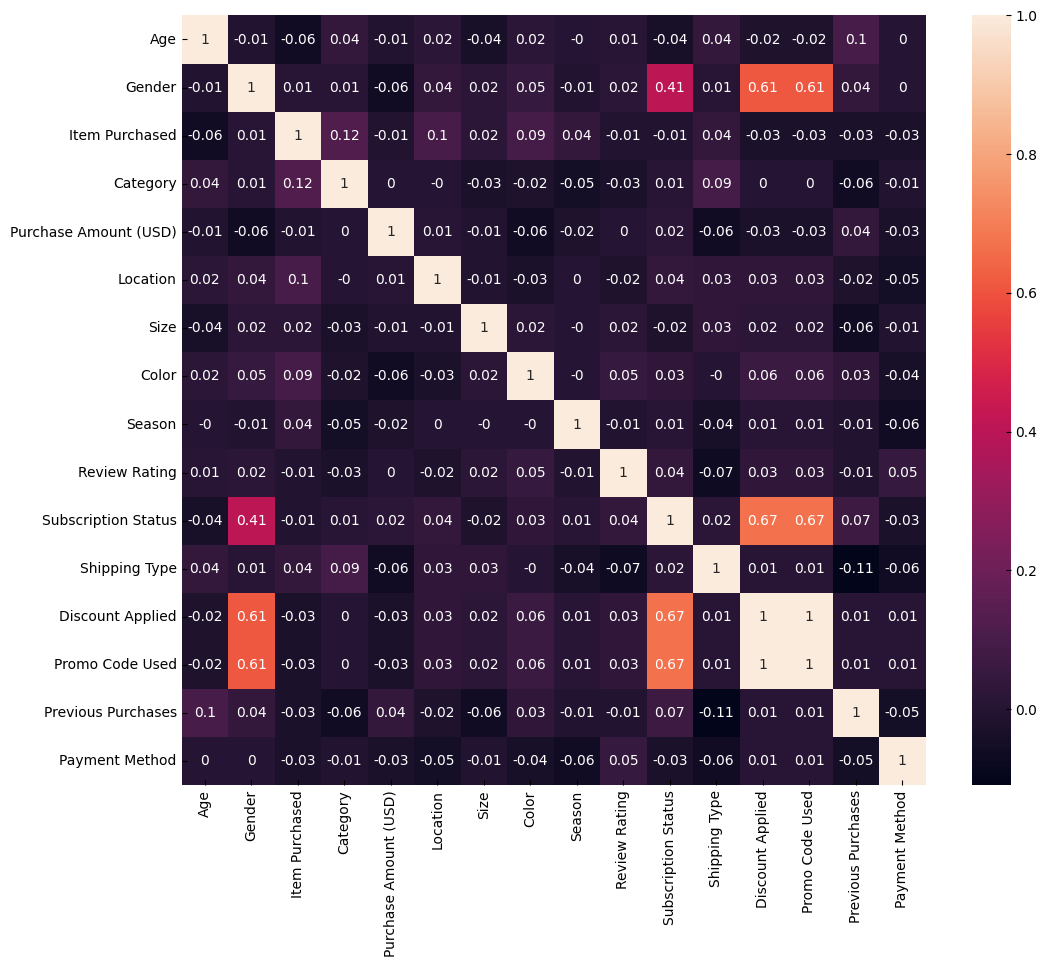

In [65]:
def show_corr():
    data_3mth = get_purch_freq('Every 3 Months')

    for col in data_3mth.columns:
        if data_3mth[col].dtype == 'object':
            enc = pp.LabelEncoder()
            data_3mth[col] = enc.fit_transform(data_3mth[col])
            
    plt.figure(figsize=(12, 10))
    sb.heatmap(data_3mth.corr().round(2), annot=True)
    
show_corr()

In [66]:
data_3mth = get_purch_freq('Every 3 Months')

data_3mth

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method
0,21,Male,Pants,Clothing,51,Louisiana,M,Black,Winter,2.8,Yes,Express,Yes,Yes,50,Cash
1,56,Male,Shorts,Clothing,56,Kentucky,L,Cyan,Summer,5.0,Yes,Next Day Air,Yes,Yes,7,Bank Transfer
2,54,Male,Handbag,Accessories,94,North Carolina,M,Gray,Fall,4.4,Yes,Free Shipping,Yes,Yes,41,PayPal
3,29,Male,Dress,Clothing,37,Florida,M,Red,Winter,3.7,Yes,2-Day Shipping,Yes,Yes,44,Venmo
4,55,Male,Scarf,Accessories,68,Texas,M,Orange,Winter,4.7,Yes,Store Pickup,Yes,Yes,21,Credit Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,42,Female,Hat,Accessories,21,Texas,S,Yellow,Summer,3.1,No,Store Pickup,No,No,29,Credit Card
580,25,Female,Shorts,Clothing,42,Nebraska,M,Olive,Spring,4.2,No,Store Pickup,No,No,28,Cash
581,61,Female,Sandals,Footwear,46,Ohio,L,Lavender,Fall,3.2,No,Next Day Air,No,No,19,Cash
582,55,Female,T-shirt,Clothing,97,Minnesota,M,Black,Fall,4.1,No,2-Day Shipping,No,No,20,Bank Transfer


In [67]:
data_3mth['Gender'].value_counts()

Gender
Male      398
Female    186
Name: count, dtype: int64

In [68]:
pd.crosstab(index=data['Gender'], 
            columns=data['Frequency of Purchases'], 
            margins=True, 
            normalize=True).round(2) 

Frequency of Purchases,Annually,Bi-Weekly,Every 3 Months,Fortnightly,Monthly,Quarterly,Weekly,All
Gender,,,,,,,,
Female,0.05,0.05,0.05,0.04,0.05,0.04,0.04,0.32
Male,0.10,0.09,0.10,0.10,0.09,0.10,0.09,0.68
All,0.15,0.14,0.15,0.14,0.14,0.14,0.14,1.00


In [71]:
def get_bayesian_proba(A, B, 
                       calc_proba, given_that, 
                       data=data):
    
    ct_data = pd.crosstab(index=data[A], 
                          columns=data[B], 
                          margins=True)
    
    # Conditional probability:
    # p(B|A) = p(B and A) / p(A)
    proba_BA = (ct_data.loc[calc_proba, given_that] 
                / ct_data.loc[calc_proba, 'All'])
    
    # Bayesian probability:
    # p(A|B) = p(A) * p(B|A) / p(B)
    proba_AB = (ct_data.loc[calc_proba, 'All'] 
                * proba_BA 
                / ct_data.loc['All', given_that])
    
    return round(proba_AB, 2)


def show_bayes_bars(X, y, data=data):


    for typ in data[y].unique():
        p = get_bayesian_proba(A=X, 
                               B=y, 
                               calc_proba='Male', 
                               given_that=typ)
        
        p_ = round(1-p, 2)
        
        print(f'{typ}: {p} -- {p_}')
        
        
show_bayes_bars('Gender', 'Frequency of Purchases')

Fortnightly: 0.7 -- 0.3
Weekly: 0.68 -- 0.32
Annually: 0.68 -- 0.32
Quarterly: 0.7 -- 0.3
Bi-Weekly: 0.66 -- 0.34
Monthly: 0.67 -- 0.33
Every 3 Months: 0.68 -- 0.32


In [70]:
орпморп

NameError: name 'орпморп' is not defined

## Numeric data

In [ ]:
def show_histplot(column, data=data):
    x = data[column]
    
    if x.max() % 10 != 0:
        bins = x.max().astype(int)
    else:
        bins = (x.max() - x.min()).astype(int) 
    
    plt.figure(figsize=(10, 5))
    sb.histplot(data, 
                 x=x, 
                 kde=True, 
                 bins=bins)

    plt.show()
    

for col in data.columns:
    if data[col].dtype != 'object':
        print(col)

### *Age*

In [ ]:
show_histplot('Age')

### *Purchase Amount (USD)*

In [ ]:
show_histplot('Purchase Amount (USD)') 

### *Review Rating*

In [ ]:
show_histplot('Review Rating')

### *Previous Purchases*

In [ ]:
show_histplot('Previous Purchases')

## Categorical data

In [ ]:
def show_barplot(column, data=data):
    data_vc = data[column].value_counts()
    
    fig_width = len(data_vc.index) + 5
    
    plt.figure(figsize=(fig_width, 5))
    sb.barplot(data_vc, palette='muted')
    
    plt.show()


for col in data.columns:
    if data[col].nunique() <= 10:
        print(col)

### *Gender*

In [ ]:
show_barplot('Gender')

### *Category*

In [ ]:
show_barplot('Category')

### *Size*

In [ ]:
show_barplot('Size')

### *Season*

In [ ]:
show_barplot('Season')

### *Subscription Status*

In [ ]:
show_barplot('Subscription Status')

### *Shipping Type*

In [ ]:
show_barplot('Shipping Type') 

### *Discount Applied*

In [ ]:
show_barplot('Discount Applied')

### *Promo Code Used*

In [ ]:
show_barplot('Promo Code Used')

### *Payment Method*

In [ ]:
show_barplot('Payment Method')

### *Frequency of Purchases*

In [ ]:
show_barplot('Frequency of Purchases') 

## Other type data

In [ ]:
for col in data.columns:
    if (data[col].nunique() > 10) and (data[col].dtype == 'object'):
        print(col)

### *Item Purchased*

In [ ]:
data['Item Purchased'].value_counts()

### *Location*

In [ ]:
data['Location'].value_counts().index

In [ ]:
def change_location(x):
    zones = {0: ['New Jersey', 'Connecticut', 'Rhode Island', 'Massachusetts', 'New Hampshire', 'Vermont', 'Maine'], 
             1: ['Delaware', 'Pennsylvania', 'New York'], 
             2: ['Maryland', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina'], 
             3: ['Mississippi', 'Tennessee', 'Alabama', 'Georgia', 'Florida'], 
             4: ['Michigan', 'Indiana', 'Ohio', 'Kentucky'], 
             5: ['Montana', 'North Dakota', 'South Dakota', 'Minnesota', 'Iowa', 'Wisconsin'], 
             6: ['Nebraska', 'Kansas', 'Missouri', 'Illinois'], 
             7: ['Texas', 'Oklahoma', 'Arkansas', 'Louisiana'], 
             8: ['Idaho', 'Wyoming', 'Utah', 'Nevada', 'Colorado', 'Arizona', 'New Mexico'], 
             9: ['Washington', 'Oregon', 'California', 'Alaska', 'Hawaii']}
    
    for k, v in zones.items():
        if x in v:
            x = k
    
    return x


locs_vc = (data['Location']
           .apply(change_location)
           .value_counts())

plt.figure(figsize=(15, 5))
sb.barplot(locs_vc, palette='muted')

plt.show()

### *Color*

In [ ]:
data['Color'].value_counts()

In [ ]:
def change_color(x):
    colors = {'Red': ['Maroon'], 
              'Yellow': ['Gold'], 
              'Green': ['Olive'], 
              'Blue': ['Teal', 'Cyan', 'Indigo', 'Turquoise'],
              'Purple': ['Violet', 'Lavender'], 
              'Pink': ['Magenta', 'Peach'], 
              'Gray': ['Silver', 'Charcoal', 'Beige']}
    
    for k, v in colors.items():
        if x in v:
            x = k
    
    return x


colors_vc = (data['Color']
             .apply(change_color)
             .value_counts())

c_palette = colors_vc.index.tolist()

plt.figure(figsize=(15, 5))
sb.barplot(colors_vc, palette=c_palette)

plt.show()

# <center> *Data Processing*

## Binary data 

In [ ]:
for col in data.columns:
    if data[col].nunique() == 2:
        data[col] = pp.LabelEncoder().fit_transform(data[col])
    
data.describe(include='object')

In [ ]:
enc = pp.LabelEncoder()

X = pd.get_dummies(data.drop('Frequency of Purchases', axis=1), dtype=int)
y = enc.fit_transform(data['Frequency of Purchases'])

X.shape, y.shape

In [ ]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, 
                                                       random_state=RS, 
                                                       test_size=0.2, 
                                                       stratify=y)

In [ ]:
baseline = lm.LogisticRegression(multi_class='multinomial', random_state=RS).fit(X_train, y_train)

ytr = baseline.predict(X_train)
yts = baseline.predict(X_test)

m.accuracy_score(y_train, ytr), m.accuracy_score(y_test, yts)

In [ ]:
t.DecisionTreeClassifier()